<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Setting-up" data-toc-modified-id="Setting-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setting up</a></span></li></ul></li><li><span><a href="#Levels-of-education" data-toc-modified-id="Levels-of-education-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Levels of education</a></span><ul class="toc-item"><li><span><a href="#Australia" data-toc-modified-id="Australia-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Australia</a></span></li><li><span><a href="#Germany" data-toc-modified-id="Germany-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Germany</a></span></li><li><span><a href="#Netherlands" data-toc-modified-id="Netherlands-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Netherlands</a></span></li><li><span><a href="#New-Zealand" data-toc-modified-id="New-Zealand-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>New Zealand</a></span></li><li><span><a href="#South-Africa" data-toc-modified-id="South-Africa-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>South Africa</a></span></li><li><span><a href="#United-Kingdom" data-toc-modified-id="United-Kingdom-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>United Kingdom</a></span></li><li><span><a href="#United-States" data-toc-modified-id="United-States-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>United States</a></span></li><li><span><a href="#Rest-of-the-World" data-toc-modified-id="Rest-of-the-World-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Rest of the World</a></span></li><li><span><a href="#Comparison-between-countries" data-toc-modified-id="Comparison-between-countries-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Comparison between countries</a></span></li></ul></li><li><span><a href="#Academic-field-for-education-and-professional-development" data-toc-modified-id="Academic-field-for-education-and-professional-development-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Academic field for education and professional development</a></span><ul class="toc-item"><li><span><a href="#Australia" data-toc-modified-id="Australia-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Australia</a></span></li><li><span><a href="#Germany" data-toc-modified-id="Germany-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Germany</a></span></li><li><span><a href="#Netherlands" data-toc-modified-id="Netherlands-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Netherlands</a></span></li><li><span><a href="#New-Zealand" data-toc-modified-id="New-Zealand-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>New Zealand</a></span></li><li><span><a href="#South-Africa" data-toc-modified-id="South-Africa-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>South Africa</a></span></li><li><span><a href="#United-Kingdom" data-toc-modified-id="United-Kingdom-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>United Kingdom</a></span></li><li><span><a href="#United-States" data-toc-modified-id="United-States-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>United States</a></span></li><li><span><a href="#Rest-of-the-world" data-toc-modified-id="Rest-of-the-world-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Rest of the world</a></span></li><li><span><a href="#Comparison-between-countries" data-toc-modified-id="Comparison-between-countries-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Comparison between countries</a></span></li></ul></li></ul></div>

# Introduction

## Setting up

In [1]:
%%capture

# Import notebook containing the imports the functions and the dataset
%run "./0. Imports and functions.ipynb"

# Import notebook containing sampled dataset
%run "./1. Overview and sampling.ipynb"

In [2]:
plt.rcParams['figure.figsize'] = [20.0, 10.0]

# Levels of education 

In [3]:
def plot_cat_comparison(df, country, category, order_index=False):
    # Plotting the current categories and the difference with the last year
    if order_index:
        if isinstance(order_index, list):
            df = df.reindex(order_index)
        else:
            df = df.sort_index()
    ind = np.arange(len(df.index))

    try:
        diff = df['Difference with previous year']
        fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios':[7, 1]})

        # current field
        axs[0].bar(ind, df['Percentage'], align='center')

        axs[0].set_title('Current proportion of {} for {}'.format(category, country))
        rects = axs[0].patches

        # Difference from last year

        axs[1].bar(ind, df['Difference with previous year'], color=df['Difference with previous year'].apply(lambda x: 'g' if x>0 else 'orange'))
        axs[1].set_title('Difference with previous year')
        for ax in axs:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
    

    except KeyError:
        # Set up columns
        #fig = plt.figure()
        if order_index is False:
            df.sort_values('Percentage', ascending=False, inplace=True)

        ax = df.plot(kind='bar', y='Percentage', use_index=True, grid=False, legend=False)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False) 
        rects = ax.patches
      

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}%".format(y_value)

        # Create annotation
        try:
            axs[0].annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va)                      # Vertically align label differently for
                                            # positive and negative values.
        except UnboundLocalError:
            ax.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va)                      # Vertically align label differently for
                                            # positive and negative values.
    plt.xticks(ind, df.index, rotation=90)
    plt.show();

The education questions is tight to each countries as each of them have their own educative system. Therefore this section is separated between all countries.
All of them had the same question:
* `What is the highest level of education you have attained?`

But the list of diploma was different for each country. In case of a participant from a country without a predefined list, a free text answer was given. 

In [4]:
# Create a separated df for following sections
df_edu_per_country = df[df['Year'] == 2018][['Country', 'edu1. What is the highest level of education you have attained?']].copy()
df_edu_per_country.columns = ['Country', 'Education']

## Australia

In [5]:
# Set up variables
country = 'Australia'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for Australia,,
AQF 10 - Doctoral Degree,63,64.29
AQF 8 - Bachelor Honours Degree / Graduate Certificate / Graduate Diploma,13,13.27
AQF 7 - Bachelor Degree,11,11.22
AQF 9 - Masters Degree,11,11.22


## Germany

In [6]:
# Set up variables
country = 'Germany'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for Germany,,
Master degree,169,50.90
Doctorate,133,40.06
Undergraduate degree,19,5.72
"Final secondary-school examinations, general qualification for university entrance",7,2.11
Other,4,1.20


## Netherlands

In [7]:
# Set up variables
country = 'Netherlands'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for Netherlands,,
PhD,27,50.00
WO (Wetenschappelijk onderwijs) Master,20,37.04
HBO (Hoger beroepsonderwijs) Master,3,5.56
WO (Wetenschappelijk onderwijs) Bachelor,3,5.56
HBO (Hoger beroepsonderwijs) Bachelor,1,1.85


## New Zealand

In [8]:
# Set up variables
country = 'New Zealand'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for New Zealand,,
Doctorate,14,37.84
Master degree,10,27.03
Undergraduate degree,10,27.03
"Further Education (NVQ A-Level, ...)",2,5.41
Other,1,2.70


## South Africa

In [9]:
# Set up variables
country = 'South Africa'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for South Africa,,
Doctorate,7,30.43
Master degree,6,26.09
Undergraduate degree,6,26.09
"Further Education (NVQ A-Level, ...)",2,8.70
Other,2,8.70


## United Kingdom

In [10]:
# Set up variables
country = 'United Kingdom'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for United Kingdom,,
Doctorate,166,70.34
Master degree,48,20.34
Undergraduate degree,21,8.90
GSCEs,1,0.42


## United States

In [11]:
# Set up variables
country = 'United States'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for United States,,
Doctorate,67,45.58
Master degree,46,31.29
Undergraduate degree,33,22.45
Other,1,0.68


## Rest of the World

In [12]:
# Set up variables
country = 'World'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for World,,
PhD,25,46.30
Masters,3,5.56
Ph.D.,3,5.56
Msc,2,3.70
bachelor,2,3.70
Phd,2,3.70
masters,1,1.85
Master of science,1,1.85
Bachelor's degree,1,1.85


## Comparison between countries

Even if the countries have different education levels, it is possible to match them on the common "Doctorate" and "Master degree". 
Therefore we compare them with these two equivalent levels and merge all others under the category "other".

In [13]:
# Create dictionary to replace values. These values may not be present in the current df but are present in the
# potential answers
dict_values = {'PhD': 'Doctorate', 
               'AQF 10 - Doctoral Degree': 'Doctorate',
               'HBO (Hoger beroepsonderwijs) Master': 'Master degree',
               'WO (Wetenschappelijk onderwijs) Master': 'Master degree',
               'AQF 9 - Masters Degree': 'Master degree'}
list_value_to_keep = ['Doctorate', 'Master degree', np.NaN]

# Replace the value in education
df_edu_per_country['Education'] = df_edu_per_country['Education'].replace(dict_values)

# Create a new columns if "World" if the country is not in the list
def merge_edu(x):
    if x in list_value_to_keep:
        return x
    elif x == np.NaN:
        return x
    else:
        return 'Other'
    
# Apply the function to a new columns
df_edu_per_country['Level of education'] = df_edu_per_country['Education'].apply(merge_edu)

# Count the values per countries
df_edu_comparison = df_edu_per_country.groupby('Country')['Level of education'].value_counts().rename('Total count').reset_index()

# Add a percentage of each type of diploma per countries
df_edu_comparison['Percentage per countries'] = (df_edu_comparison['Total count'] / df_edu_comparison.groupby('Country')['Total count'].transform('sum')*100).round(2)

# Display the results
df_edu_comparison

,Country,Level of education,Total count,Percentage per countries
0,Australia,Doctorate,63,64.29
1,Australia,Other,24,24.49
2,Australia,Master degree,11,11.22
3,Germany,Master degree,169,50.90
4,Germany,Doctorate,133,40.06
5,Germany,Other,30,9.04
6,Netherlands,Doctorate,27,50.00
7,Netherlands,Master degree,23,42.59
8,Netherlands,Other,4,7.41
9,New Zealand,Doctorate,14,37.84


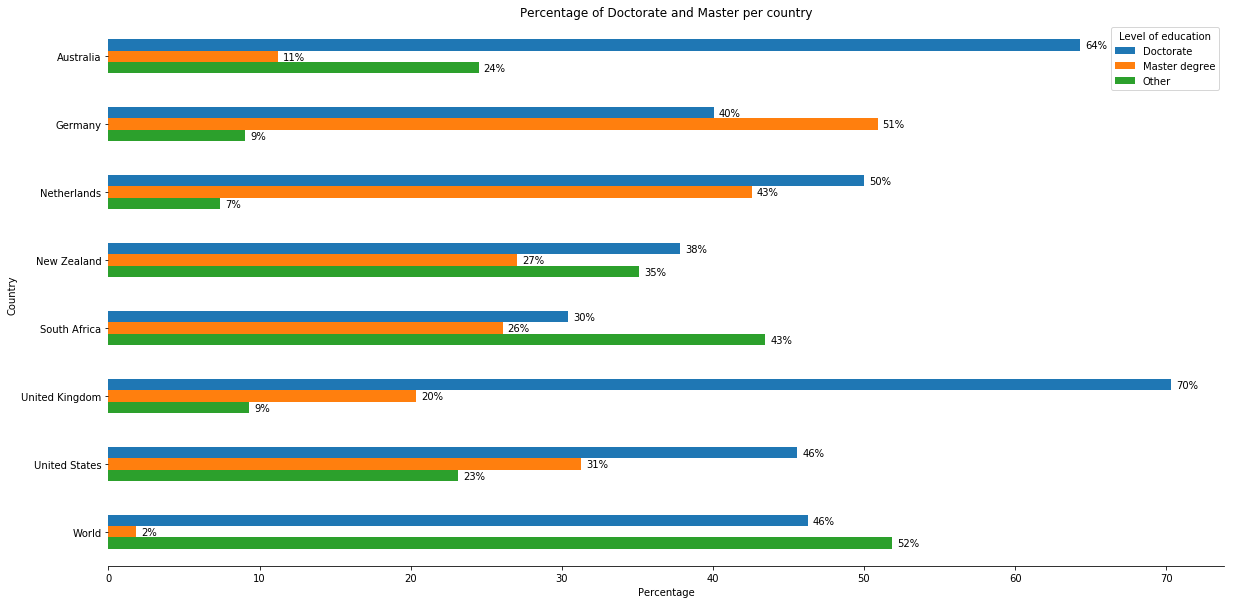

In [14]:
fig, ax = plt.subplots()
df_plot = df_edu_comparison.pivot(index='Country', 
                        columns='Level of education', 
                        values='Percentage per countries')
df_plot.plot(kind='barh',
                  title='Percentage of Doctorate and Master per country',
                  grid=False, ax=ax)

ax.set(xlabel="Percentage", ylabel="Country")

ax.invert_yaxis()  # when barh option, the bars are inverted 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False) 
for p in ax.patches:
    if int(round(p.get_width())) > 0:
        ax.annotate('{}%'.format(str(int(round(p.get_width())))), 
                                 (p.get_x() + p.get_width(), p.get_y()), 
                                  xytext=(5, -9),
                                  textcoords='offset points')
plt.show();

# Academic field for education and professional development

Alongside of question about education level we also asked the participants in which field they finished their highest level of education. 
Here again the propositions were specific to each countries.

In [15]:
# Create a column that merge all education columns
df_edu_field = df[['Year', 'Country']].copy()

# There are numbers in some of the fields, removing them as they are not needed
def remove_digit(s):
    try:
        return ''.join([i for i in s if not i.isdigit()])
    except TypeError:
        return s

df['Academic field'] = df['edu2. In which discipline is your highest academic qualification?'].apply(remove_digit)
columns = 'Academic field'

prof_qual = ['edu4. List any professional qualifications you hold (eg. P. Eng, PMP, …)?']

## Australia

In [16]:
# Set up variables
country = 'Australia'
category = 'Field of education'
result = count_diff(df, columns, country, category)

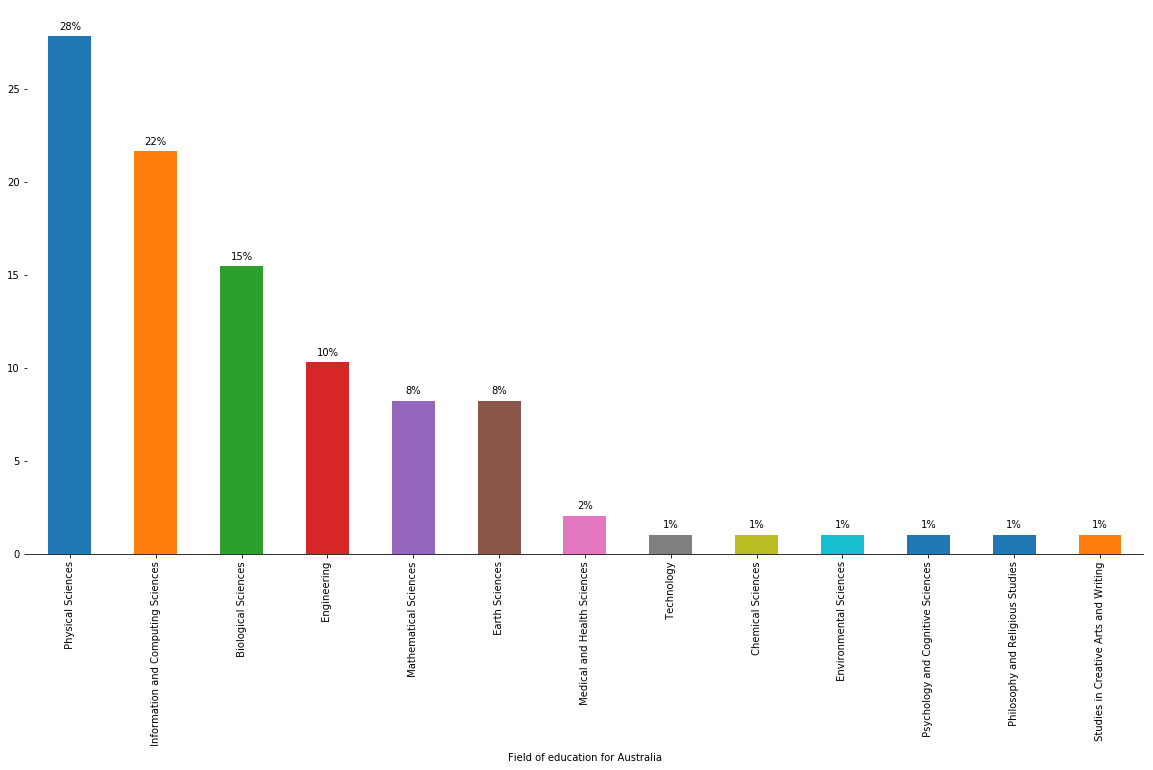

In [17]:
plot_cat_comparison(result, country, 'Field of education')

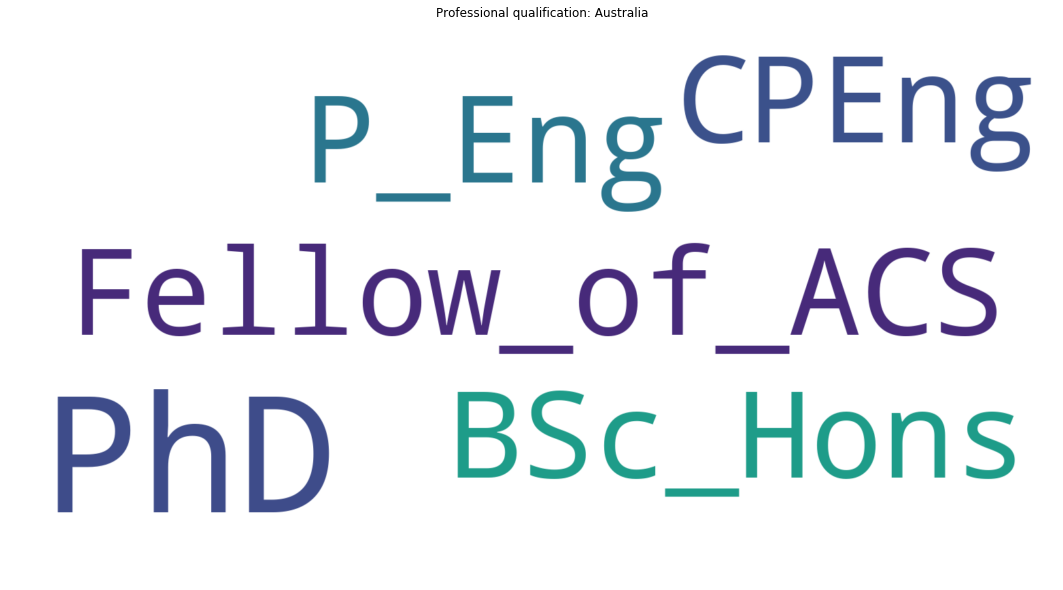

In [18]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## Germany

In [19]:
# Set up variables
country = 'Germany'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for Germany,,,
Computer Science,85,25.835866,9.220482
Physics and Astronomy,75,22.796353,-2.742109
Geography & Environmental Sciences,25,7.598784,0.521861
Biological Sciences,24,7.294833,-4.089783
Mathematics,24,7.294833,2.064064
Electrical & Electronic Engineering,18,5.471125,3.009586
Mechanical Engineering,11,3.343465,1.805004
Geology,9,2.735562,0.889408
Materials Technology,6,1.823708,NaN


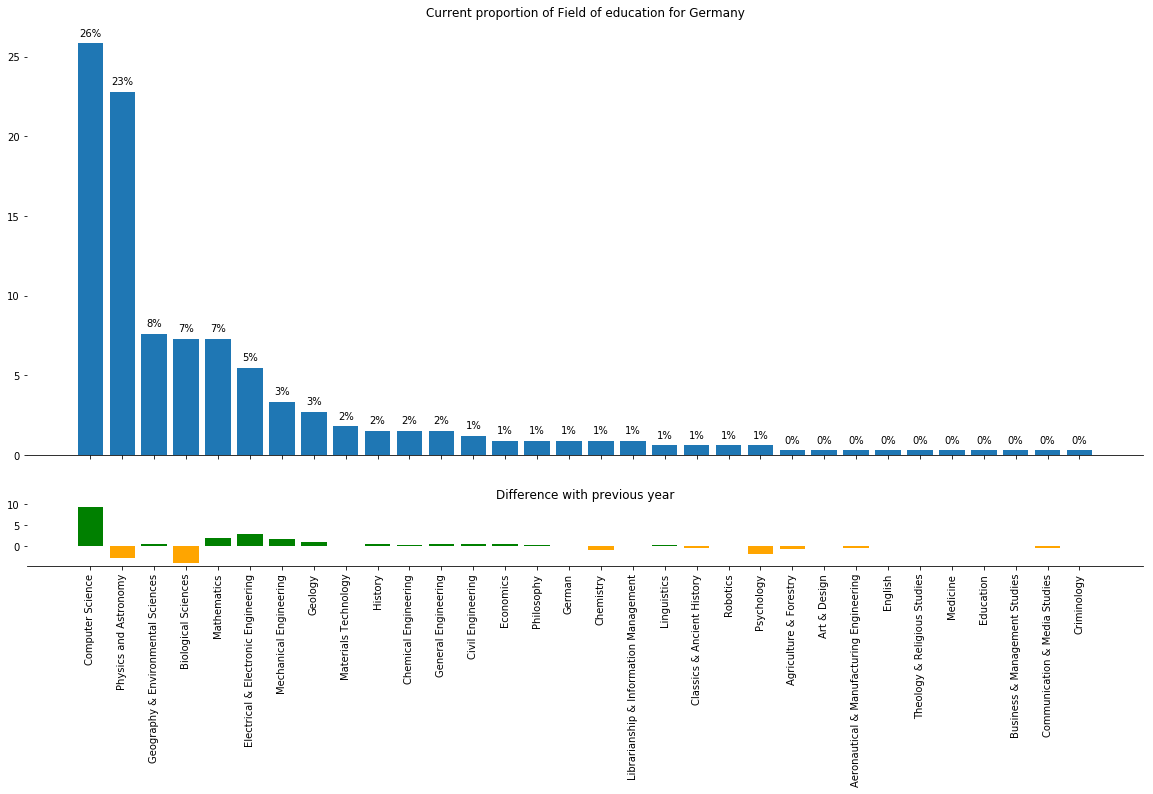

In [20]:
plot_cat_comparison(result, country, category)

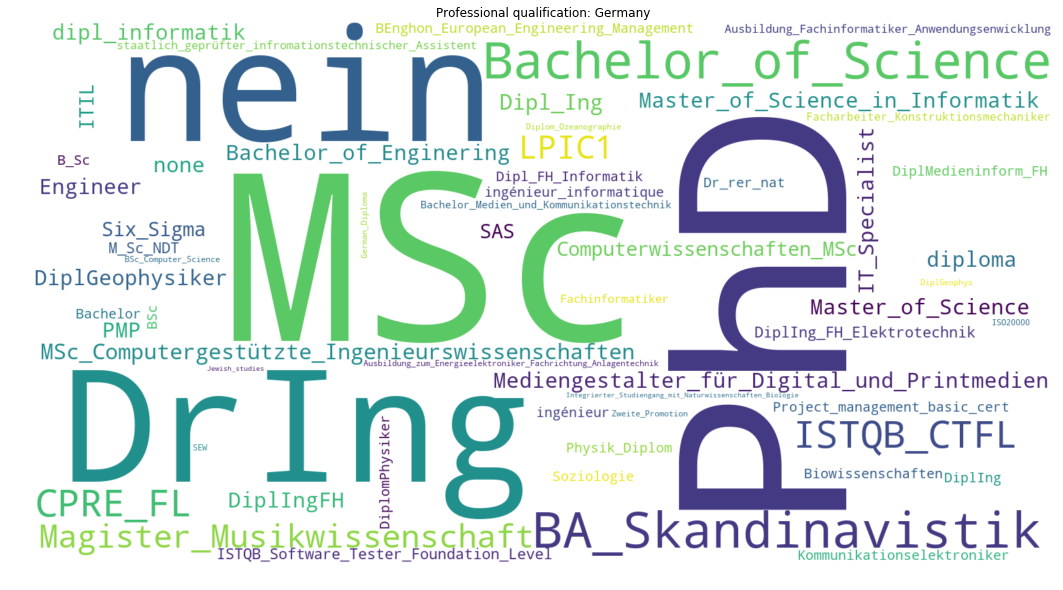

In [21]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## Netherlands

In [22]:
# Set up variables
country = 'Netherlands'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for Netherlands,,,
Physics and Astronomy,18,33.333333,9.333333
Computer Science,11,20.370370,-6.296296
Biological Sciences,8,14.814815,2.814815
Chemistry,3,5.555556,-3.777778
Civil Engineering,2,3.703704,NaN
Electrical & Electronic Engineering,2,3.703704,2.370370
Geography & Environmental Sciences,2,3.703704,-1.629630
Art & Design,1,1.851852,NaN
Communication & Media Studies,1,1.851852,-2.148148


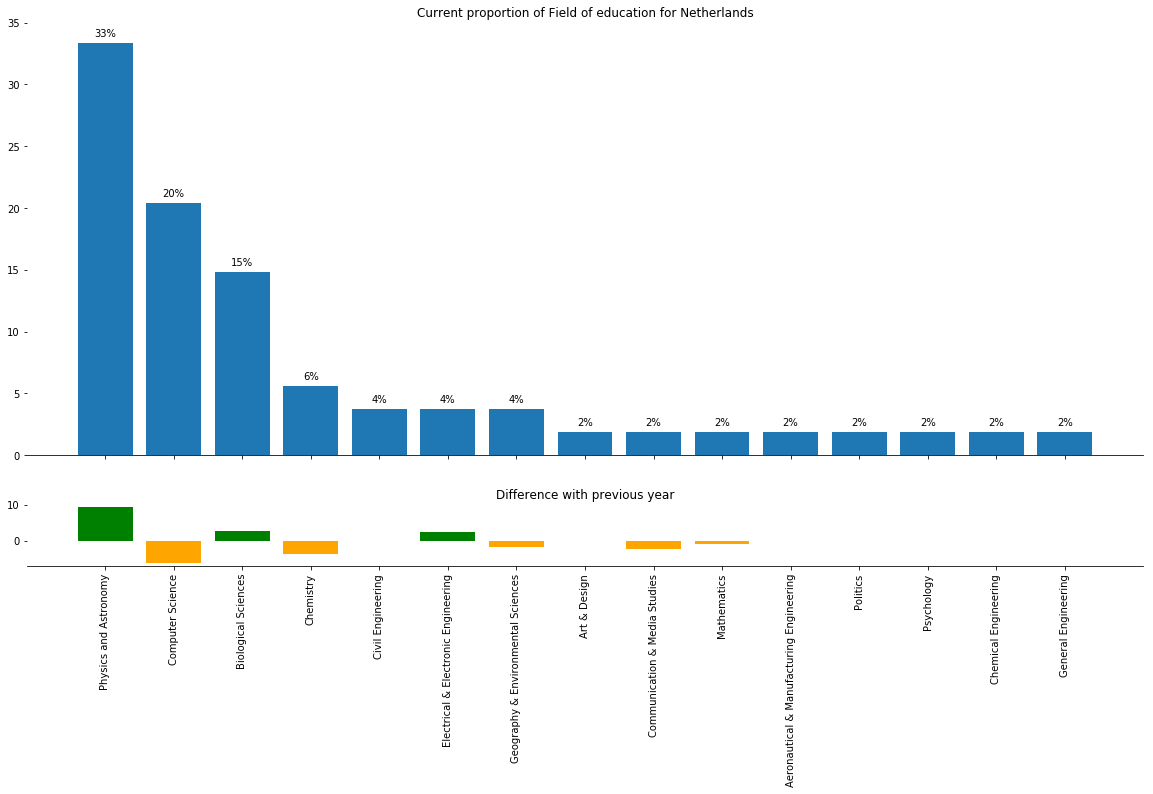

In [23]:
plot_cat_comparison(result, country, category)

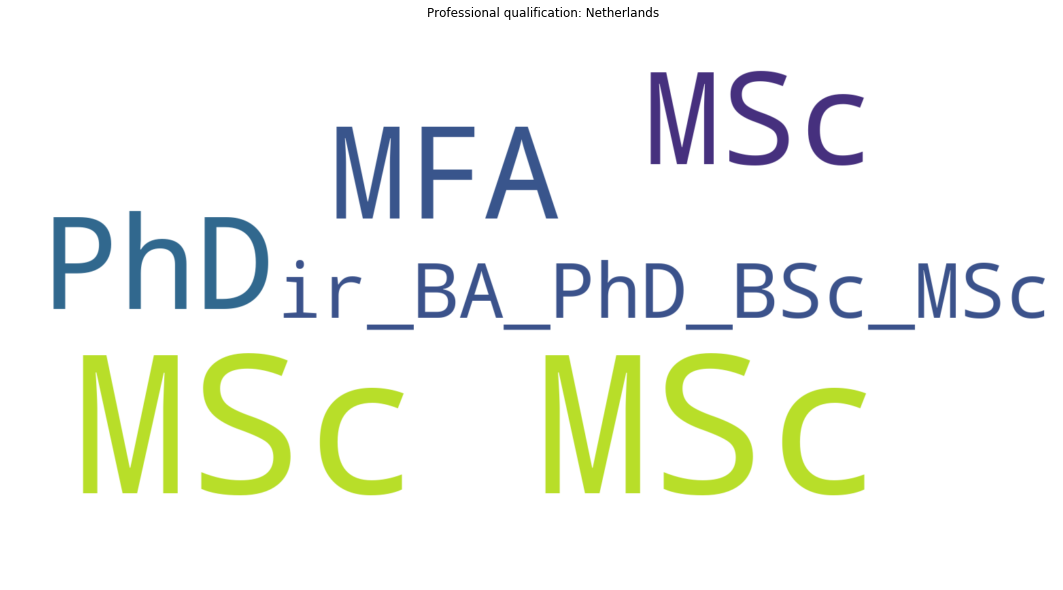

In [24]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## New Zealand

In [25]:
# Set up variables
country = 'New Zealand'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage
Field of education for New Zealand,,
Computer Science,11,29.729730
Biological Sciences,7,18.918919
Mathematics,4,10.810811
Physics and Astronomy,4,10.810811
Business & Management Studies,2,5.405405
Electrical & Electronic Engineering,2,5.405405
Mechanical Engineering,2,5.405405
Civil Engineering,1,2.702703
Chemistry,1,2.702703


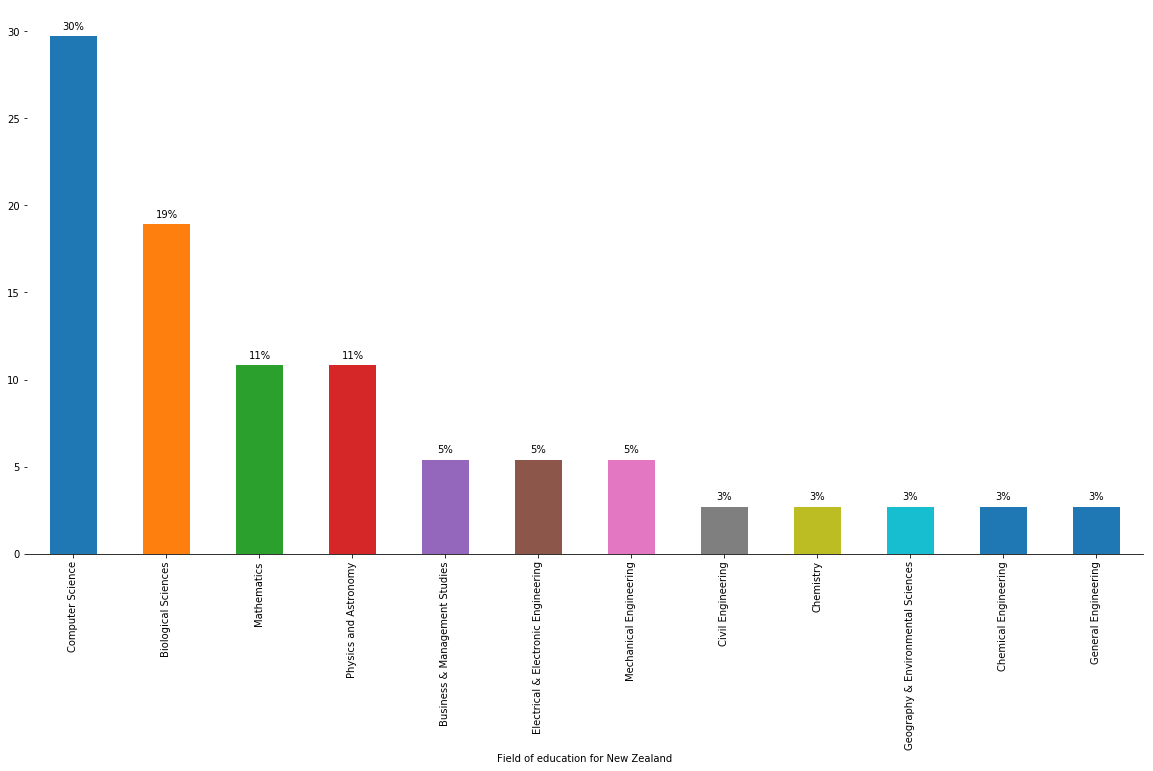

In [26]:
plot_cat_comparison(result, country, category)

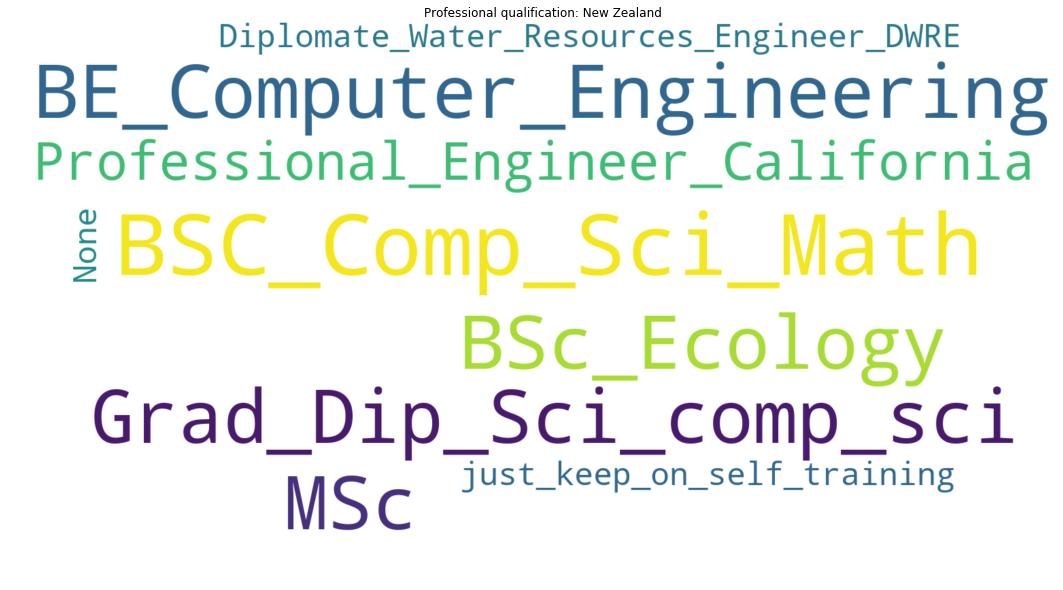

In [27]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## South Africa

In [28]:
# Set up variables
country = 'South Africa'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for South Africa,,,
Computer Science,10,45.454545,40.191388
Biological Sciences,4,18.181818,NaN
Mathematics,3,13.636364,NaN
Psychology,1,4.545455,NaN
Communication & Media Studies,1,4.545455,NaN
Business & Management Studies,1,4.545455,NaN
Physics and Astronomy,1,4.545455,-58.612440
Economics,1,4.545455,-0.717703


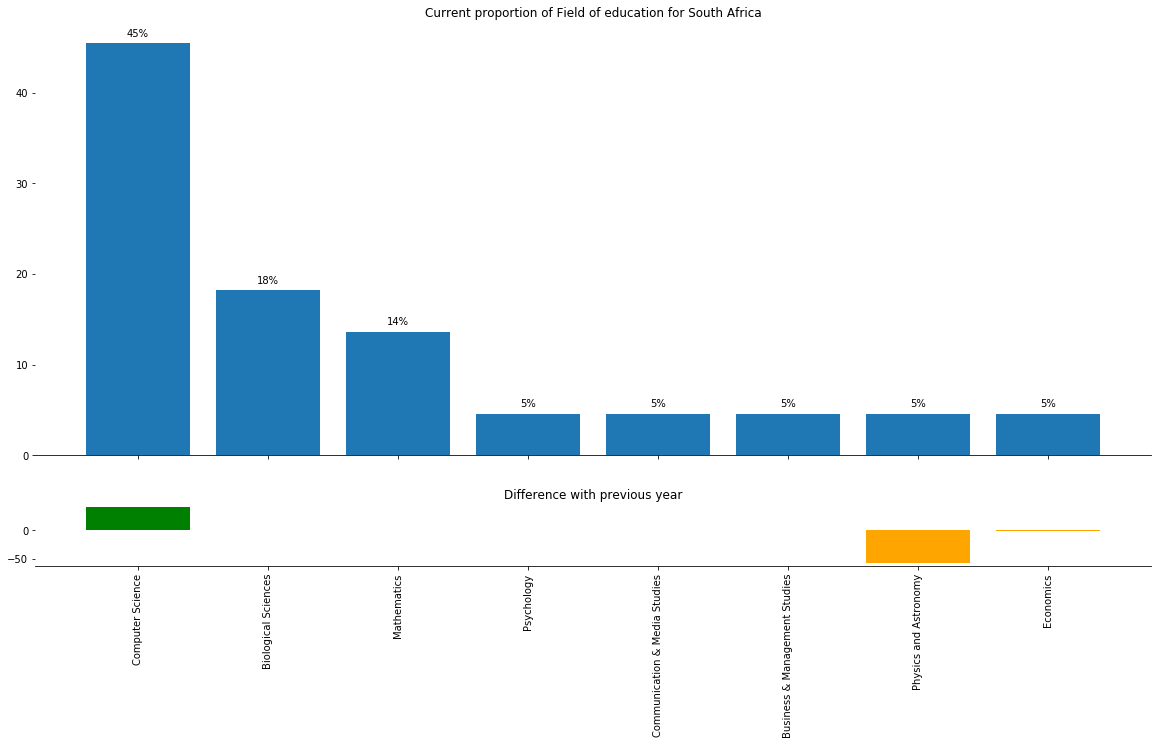

In [29]:
plot_cat_comparison(result, country, category)

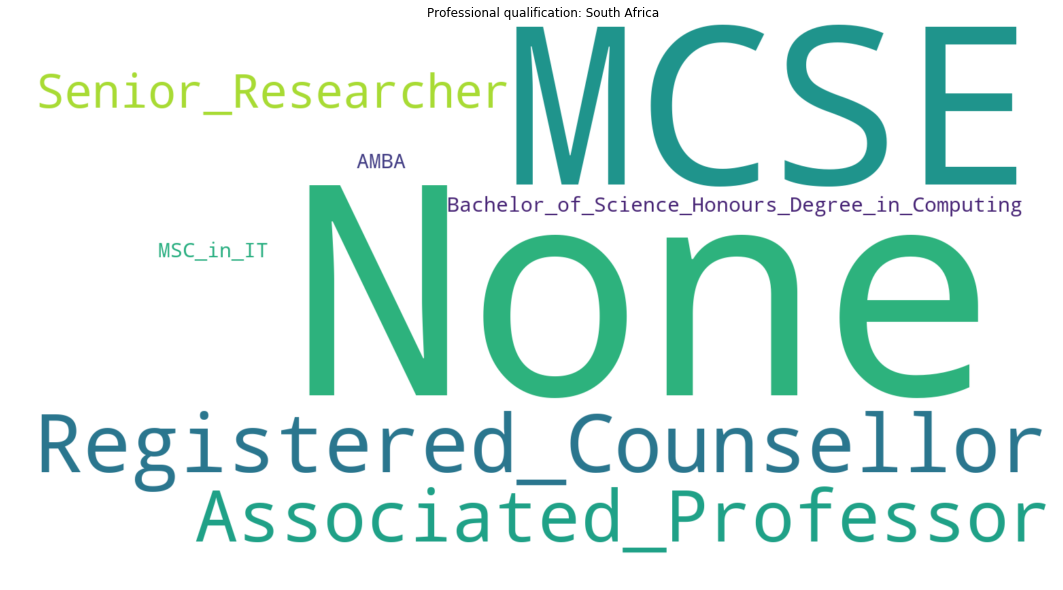

In [30]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## United Kingdom

In [31]:
# Set up variables
country = 'United Kingdom'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for United Kingdom,,,
Physics and Astronomy,81,34.468085,6.304820
Computer Science,56,23.829787,-3.108988
Biological Sciences,28,11.914894,5.792445
Mathematics,18,7.659574,-0.095528
Chemistry,12,5.106383,-1.424229
Geography & Environmental Sciences,11,4.680851,0.599218
Electrical & Electronic Engineering,6,2.553191,-0.712115
Geology,4,1.702128,0.477638
General Engineering,4,1.702128,0.477638


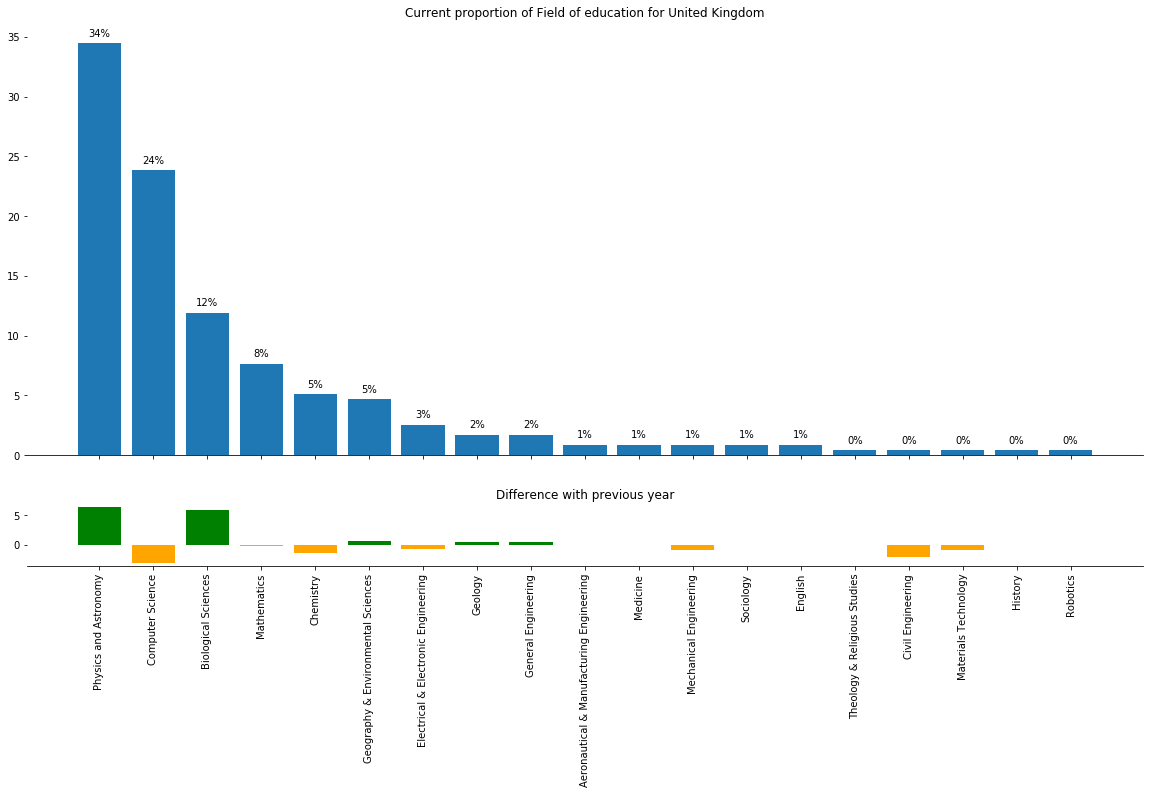

In [32]:
plot_cat_comparison(result, country, category)

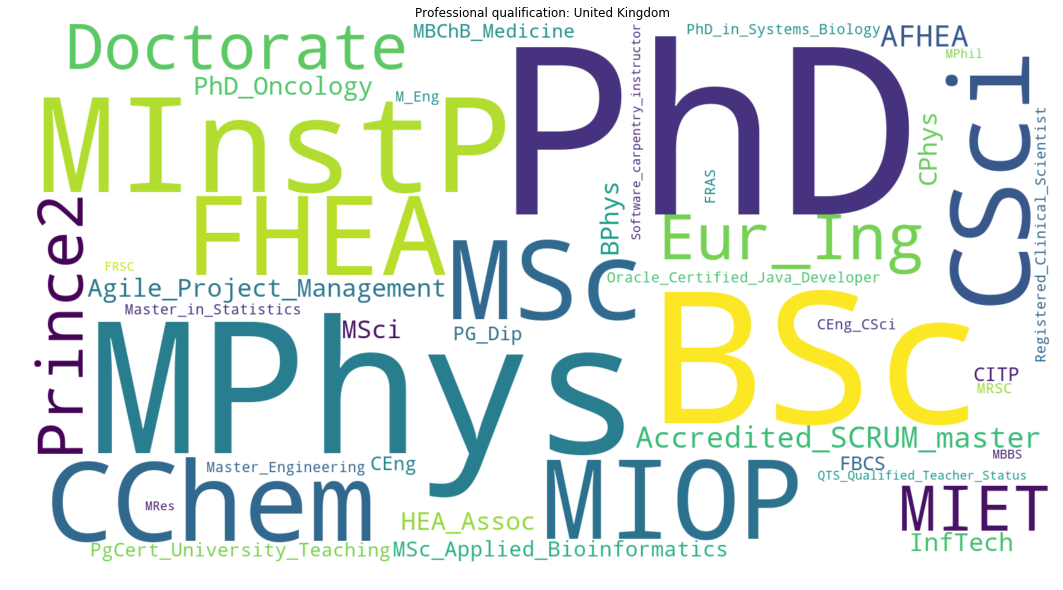

In [33]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## United States

In [34]:
# Set up variables
country = 'United States'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for United States,,,
Physics and Astronomy,44,30.344828,16.234398
Computer Science,38,26.206897,1.053522
Biological Sciences,14,9.655172,-5.068754
Mathematics,13,8.965517,3.444045
Electrical & Electronic Engineering,6,4.137931,1.070446
Geography & Environmental Sciences,4,2.758621,2.145124
History,2,1.379310,NaN
Chemical Engineering,2,1.379310,-0.461180
Mechanical Engineering,2,1.379310,-2.915168


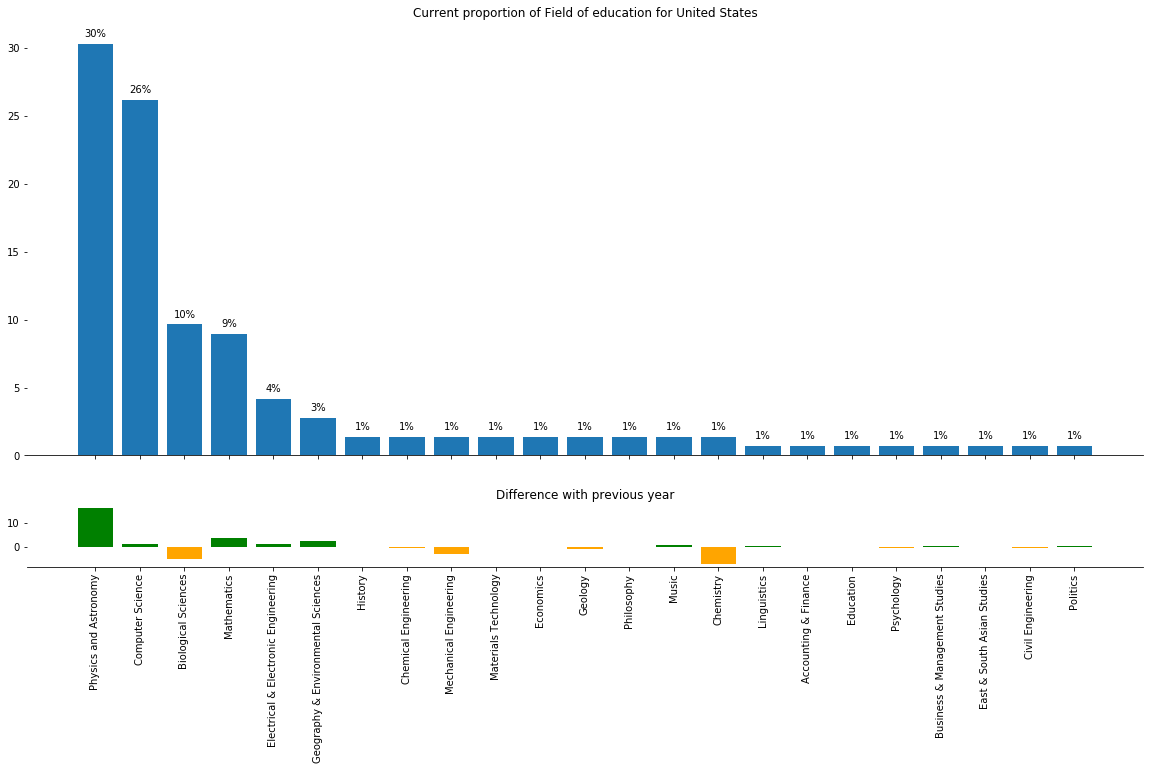

In [35]:
plot_cat_comparison(result, country, category)

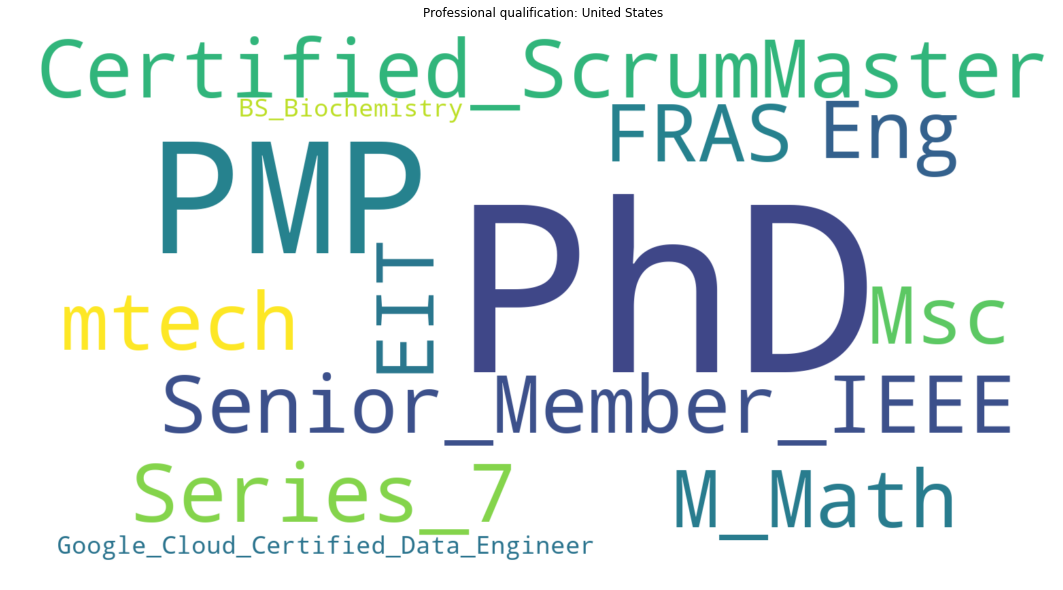

In [36]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## Rest of the world

In [37]:
# Set up variables
country = 'World'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage
Field of education for World,,
Biological Sciences,10,18.518519
Physics and Astronomy,10,18.518519
Computer Science,9,16.666667
Mathematics,6,11.111111
Geography & Environmental Sciences,3,5.555556
Electrical & Electronic Engineering,2,3.703704
Psychology,2,3.703704
Education,2,3.703704
Business & Management Studies,1,1.851852


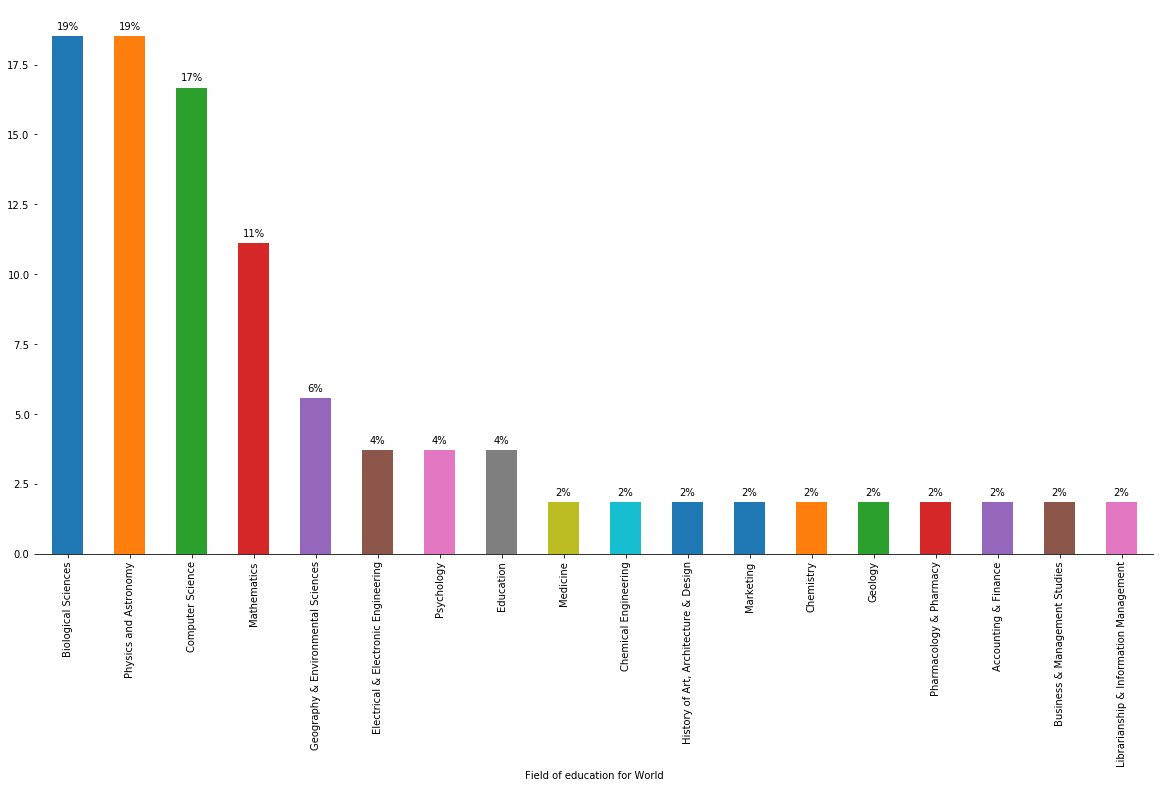

In [38]:
plot_cat_comparison(result, country, category)

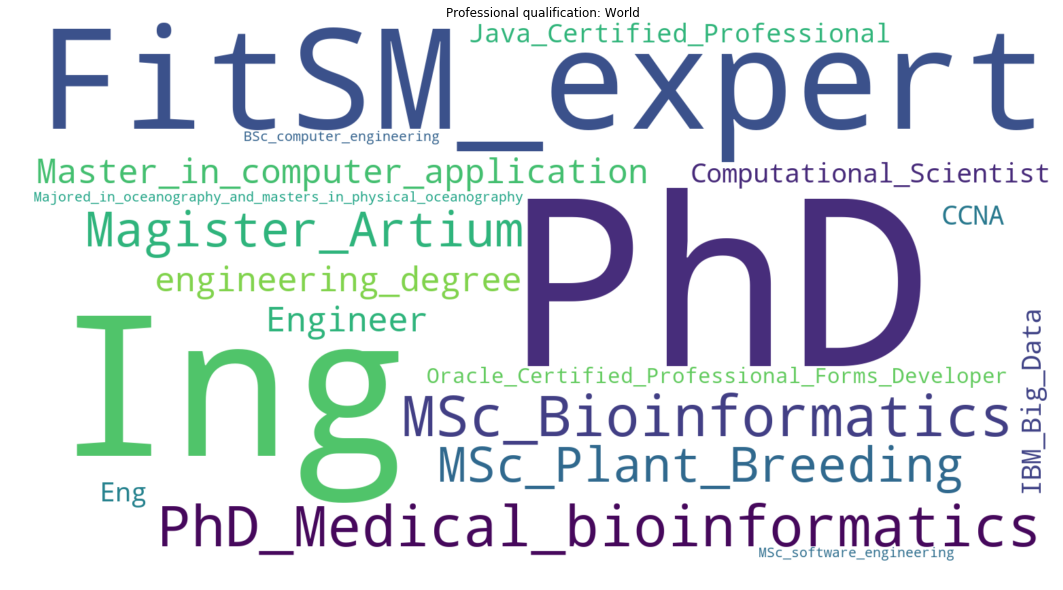

In [39]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## Comparison between countries

In [40]:
# Count the values per countries
#df_edu_comparison = df_edu_field.groupby('Country')['Academic field'].value_counts().rename('Total count').reset_index()

# Add a percentage of each type of diploma per countries
#df_edu_comparison['Percentage per countries'] = (df_edu_comparison['Total count'] / df_edu_comparison.groupby('Country')['Total count'].transform('sum')*100)

# Display the results
#df_edu_comparison

In [41]:
#fig, ax = plt.subplots()
#df_plot = df_edu_comparison.pivot(index='Country', 
#                        columns='Academic field', 
#                        values='Percentage per countries')

#df_plot.plot(kind='barh',
#                  title='Percentage of academic field per country',
#                  grid=False, ax=ax, stacked=True)

#ax.set(xlabel="Country", ylabel="Percentage")

#ax.invert_yaxis()  # when barh option, the bars are inverted 
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False) 
# Put a legend below current axis
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
#          fancybox=True, shadow=True, ncol=5)
#for p in ax.patches:
#    if int(round(p.get_width())) >= 5:
#        ax.annotate('{}%'.format(str(int(round(p.get_width())))), 
#                    (p.get_x() + int(p.get_width())/2., p.get_y()+ int(p.get_height())/2.),
#                    ha='center')

#plt.show();